**Extract Text from PDFs and Images with Amazon Textract**

In [1]:
!pip install boto3

     -------------------------------------- 139.3/139.3 kB 1.2 MB/s eta 0:00:00
     --------------------------------------- 12.1/12.1 MB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 82.2/82.2 kB 4.5 MB/s eta 0:00:00


In [3]:
# Import the boto3 library, which is the Amazon Web Services (AWS) SDK for Python.
# It allows Python developers to write software that makes use of services like Amazon S3 and Amazon EC2.

import boto3
client = boto3.client('textract',region_name='us-east-1',aws_access_key_id='',aws_secret_access_key='')

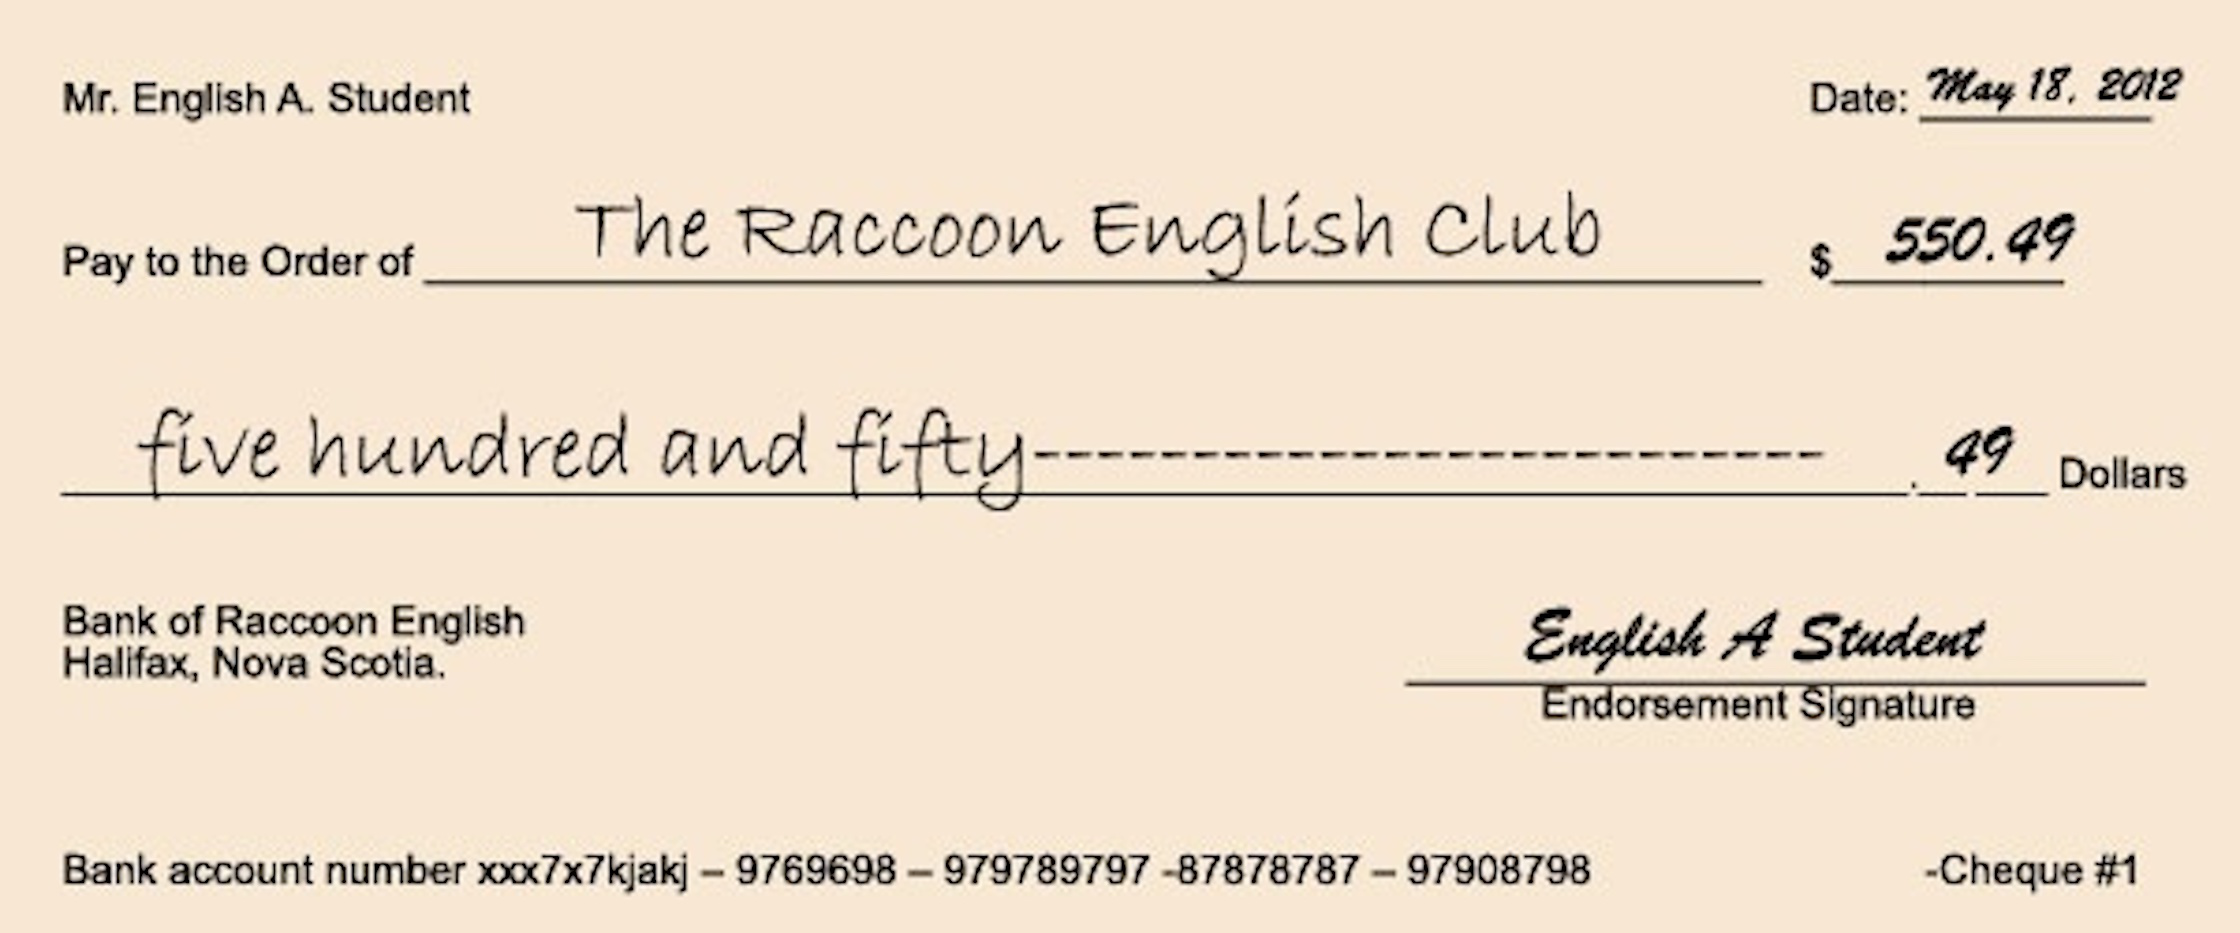

In [8]:
# PIL library, specifically the Image and ImageDraw modules, to open and display an image file
from PIL import Image, ImageDraw
image=Image.open("X_023.jpeg")
image

**Detect Text:**
- file content wil be first read in byte array. the image data will be sent to aws textract by calling its method 'detect_document_text'. This method takes the image data in the form of byte array passed as '{'Bytes': img}' and return the response containing the dected text.

In [12]:
with open('X_023.jpeg', 'rb') as image:
    img = bytearray(image.read())
    respnse = client.detect_document_text(Document = {'Bytes': img})
respnse

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 1.0,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 0.0, 'Y': 2.5994131647166796e-07},
     {'X': 1.0, 'Y': 0.0},
     {'X': 1.0, 'Y': 1.0},
     {'X': 2.907121086082043e-07, 'Y': 1.0}]},
   'Id': '1506c47d-efe8-49fe-b3a4-ec4ba356bb80',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['d78ab6bf-7ecd-4de9-b829-1ba3a844db82',
      'a35d9a41-9caa-46e0-aba8-f2f4e68becf3',
      '90c89fc9-f22b-4d59-b9d6-c6e599a9d38f',
      'd23fced1-9170-4079-aa72-9ee6a8669a03',
      'e20a7135-0e1e-4091-b8f8-c928effe2f60',
      '3401ce49-d958-499f-8003-8cb7c670b06c',
      'bda99bb2-1994-49b9-99e8-a2c8c2e6c8d8',
      'cffae3bf-50e7-4767-9c95-369ae77dbbda',
      '008c400c-daa6-43d5-90df-8019b9a2c4a3',
      'ad32e135-5ec3-465a-aeda-13b744f48e82',
      'b33673f0-14cc-4f4c-a4a9-798c1eec8aae',
      'ec171c7f-0efc-4d7b-ad79-2c621a79d73e',
      'c3cd0a9e-a51d-482

In [21]:
respnse['Blocks'][1]

{'BlockType': 'LINE',
 'Confidence': 99.71929931640625,
 'Text': 'Mr. English A. Student',
 'Geometry': {'BoundingBox': {'Width': 0.18317848443984985,
   'Height': 0.046670373529195786,
   'Left': 0.027649175375699997,
   'Top': 0.0842532068490982},
  'Polygon': [{'X': 0.027649175375699997, 'Y': 0.08461000770330429},
   {'X': 0.21082167327404022, 'Y': 0.0842532068490982},
   {'X': 0.21082766354084015, 'Y': 0.13056910037994385},
   {'X': 0.027655264362692833, 'Y': 0.1309235841035843}]},
 'Id': 'd78ab6bf-7ecd-4de9-b829-1ba3a844db82',
 'Relationships': [{'Type': 'CHILD',
   'Ids': ['63494713-a4bc-486f-b920-7399b087ab43',
    '01054dd2-bd44-42a7-b335-05d210622f13',
    '60d7dd6a-e06b-4f73-948e-05fbf262a9f1',
    'e18b356e-cdc7-40df-b204-cec7a5638bab']}]}

In [20]:
respnse['Blocks'][50]

{'BlockType': 'WORD',
 'Confidence': 99.6677017211914,
 'Text': 'Endorsement',
 'TextType': 'PRINTED',
 'Geometry': {'BoundingBox': {'Width': 0.11092803627252579,
   'Height': 0.040827199816703796,
   'Left': 0.6875701546669006,
   'Top': 0.7317589521408081},
  'Polygon': [{'X': 0.6875701546669006, 'Y': 0.731955349445343},
   {'X': 0.7984932065010071, 'Y': 0.7317589521408081},
   {'X': 0.7984981536865234, 'Y': 0.7723910212516785},
   {'X': 0.6875751614570618, 'Y': 0.7725861668586731}]},
 'Id': '92f7dc25-7eba-485f-ae93-2a5f8bdc8dbd'}

Collected all Text in a string

In [24]:
text = " "
for item in respnse["Blocks"]:
    if item["BlockType"] == "LINE":
        print(item["Text"])
        text = text + " "+item["Text"]
    

Mr. English A. Student
Date: May 18. 2012
Pay to the Order of
The Raccoon English club
$ 550.49
five hundred and fifty
49 Dollars
.
Bank of Raccoon English
Halifax, Nova Scotia.
English A Student
Endorsement Signature
Bank account number xxx7x7kjakj - 9769698-979789797-87878787 -97908798 -
-Cheque #1


In [25]:
text

'  Mr. English A. Student Date: May 18. 2012 Pay to the Order of The Raccoon English club $ 550.49 five hundred and fifty 49 Dollars . Bank of Raccoon English Halifax, Nova Scotia. English A Student Endorsement Signature Bank account number xxx7x7kjakj - 9769698-979789797-87878787 -97908798 - -Cheque #1'

AWS comprehend servies is utilized to detect entities in the provided text and then the entity detected by comprehend will be stored into dataframe where row will be entity detected in the text and column will be its information.

In [30]:
import pandas as pd
comprehend_client = boto3.client('comprehend', region_name = 'us-east-1', aws_access_key_id = '', aws_secret_access_key = '')
response = comprehend_client.detect_entities(Text = text, LanguageCode = 'en' )
# function call converts the entities detected by AWS Comprehend into a tabular form
pd.DataFrame(response['Entities'])


,Score,Type,Text,BeginOffset,EndOffset
0,0.435111,PERSON,English,6,13
1,0.999535,DATE,May 18. 2012,31,43
2,0.902940,ORGANIZATION,Raccoon English club,68,88
3,0.998939,QUANTITY,$ 550.49,89,97
4,0.885668,QUANTITY,five hundred and,98,114
5,0.800073,QUANTITY,fifty 49 Dollars,115,131
6,0.919506,ORGANIZATION,Bank of Raccoon English,134,157
7,0.837870,LOCATION,"Halifax, Nova Scotia",158,178
8,0.898291,OTHER,English,180,187
9,0.731470,OTHER,xxx7x7kjakj - 9769698-979789797-87878787 -9790...,240,290


**Locate Signature**

In [38]:
response = client.analyze_document(Document = {'Bytes': img}, FeatureTypes=["SIGNATURES"])

In [42]:
for item in response["Blocks"]:
    if item["BlockType"] == "SIGNATURE":
        Signature_block = item
Signature_block

{'BlockType': 'SIGNATURE',
 'Confidence': 86.85415649414062,
 'Geometry': {'BoundingBox': {'Width': 0.20657098293304443,
   'Height': 0.08313307911157608,
   'Left': 0.6799902319908142,
   'Top': 0.6451497077941895},
  'Polygon': [{'X': 0.6799902319908142, 'Y': 0.6455202698707581},
   {'X': 0.8865512013435364, 'Y': 0.6451497077941895},
   {'X': 0.8865612149238586, 'Y': 0.7279168963432312},
   {'X': 0.6800004839897156, 'Y': 0.7282828092575073}]},
 'Id': '19881499-2f62-4ce8-aac3-1c0e7958a4ac'}

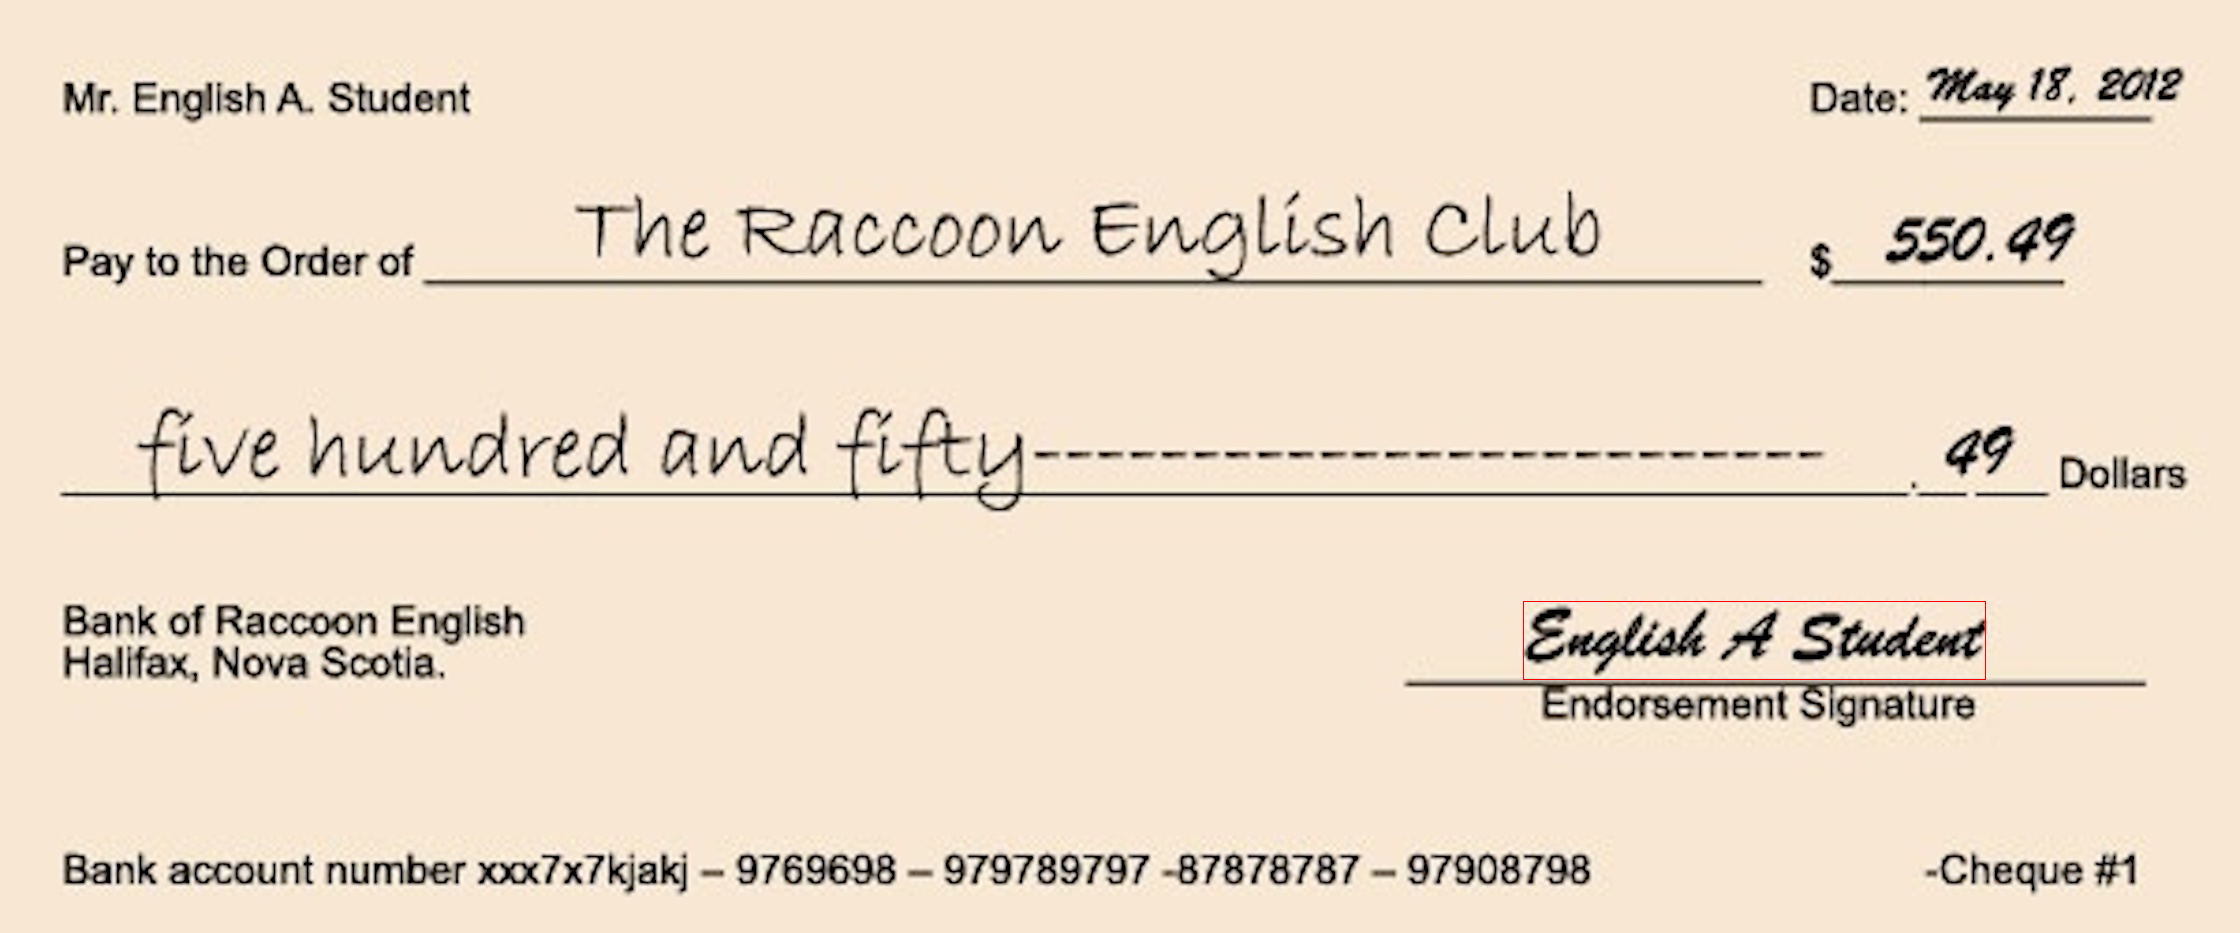

In [43]:
#Analyzes text in a document stored in an S3 bucket. Display polygon box around text and angled text 
import boto3
def ShowBoundingBox(draw,box,width,height,boxColor):
             
    left = width * box['Left']
    top = height * box['Top'] 
    draw.rectangle([left,top, left + (width * box['Width']), top +(height * box['Height'])],outline=boxColor)   
    
image=Image.open("X_023.jpeg")
width, height =image.size 
draw=ImageDraw.Draw(image)
ShowBoundingBox(draw, signtature_block['Geometry']['BoundingBox'],width,height, 'Red')
image     



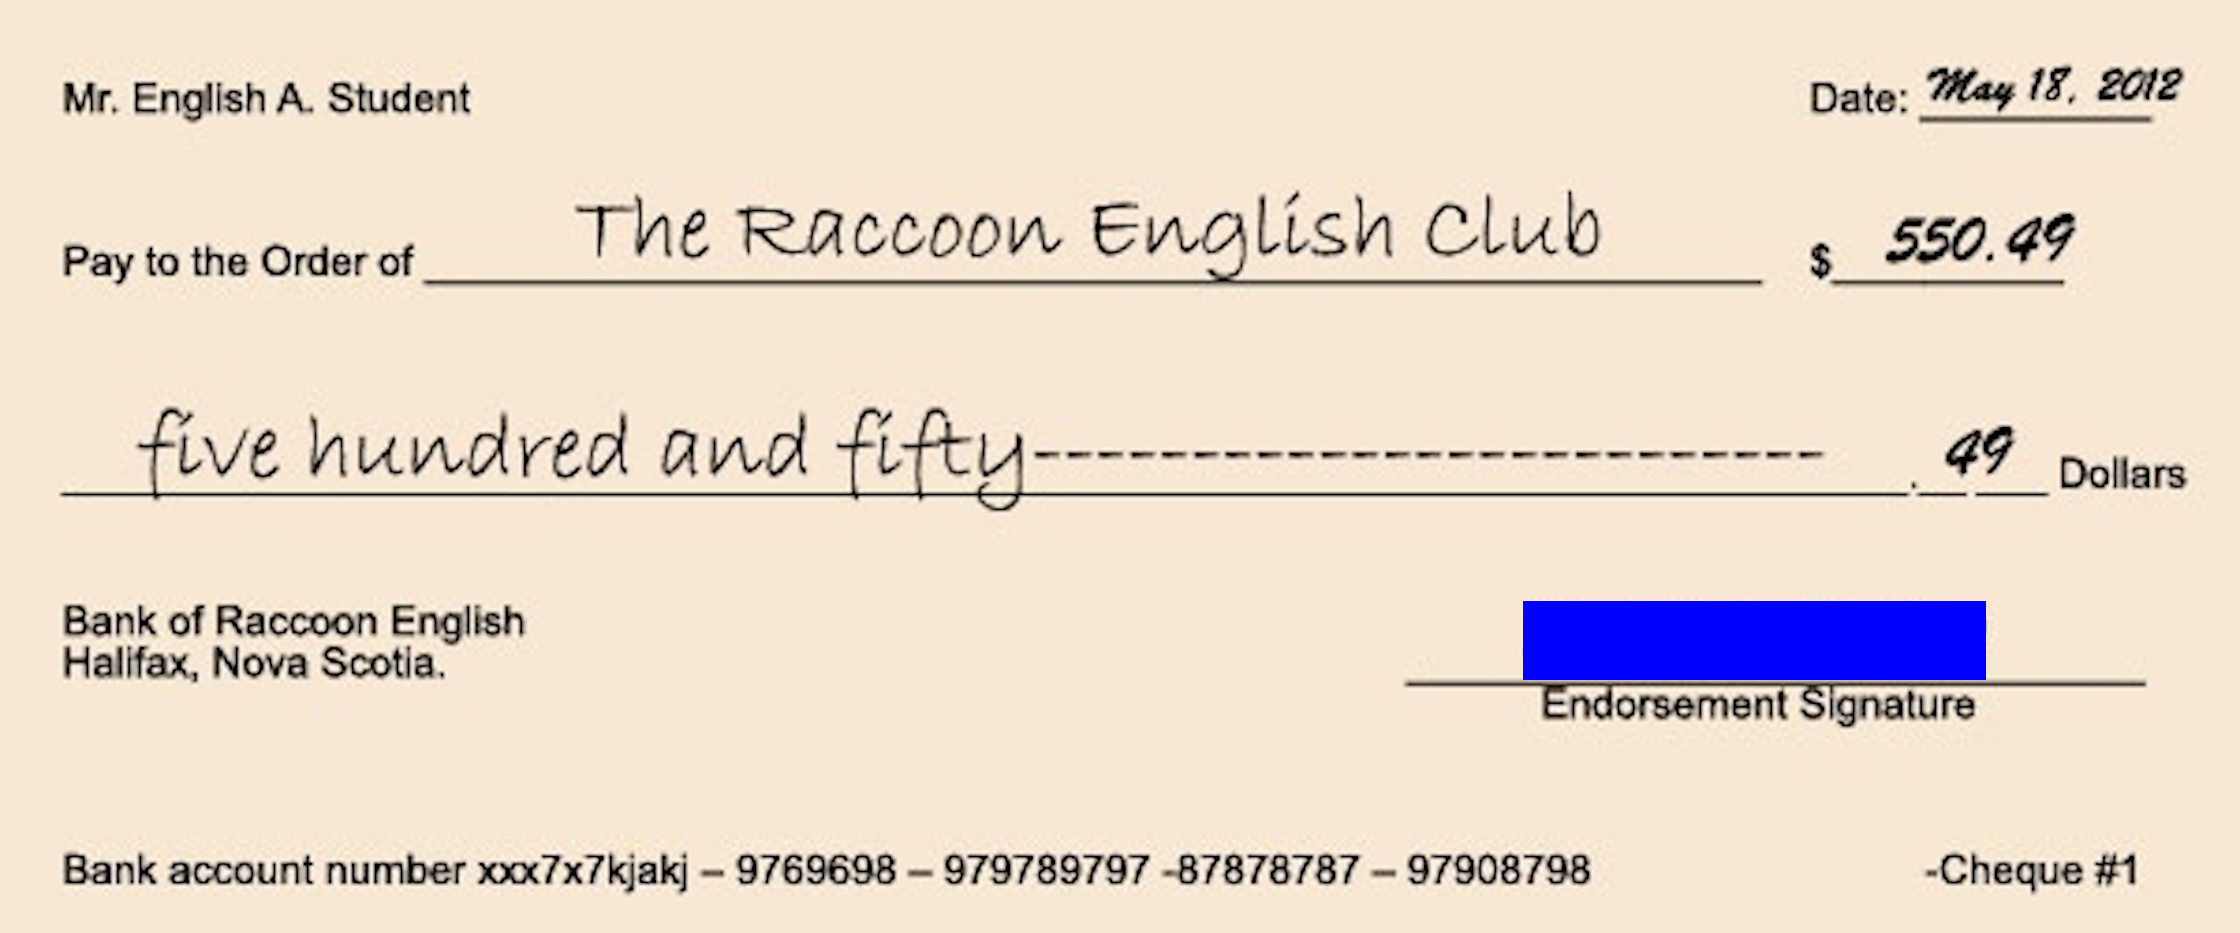

In [47]:
def ShowSelectedElement(draw, box, width, height, fillColor):
    left = width * box['Left']
    top = height * box['Top'] 
    draw.rectangle([left, top, left + (width * box['Width']), top + (height * box['Height'])], fill=fillColor)

image = Image.open("X_023.jpeg")
width, height = image.size 
draw = ImageDraw.Draw(image)
ShowSelectedElement(draw, signtature_block['Geometry']['BoundingBox'], width, height, 'Blue')
image
